## Decission Tree

En el día de hoy implementaremos de manera práctica los conceptos de los que hablamos durante la clase de Machine Learning Basics:

Tomamos en cuenta de que el dataset que estamos empleando ya está preprocesado:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier # El arbol de decisión
from sklearn.neighbors import KNeighborsClassifier # El KNN

In [7]:
# En el caso de que necesites el modulo de scikit-learn (sklearn) puedes optenerlo descomentando:

# ! pip install scikit-learn

In [8]:
# Importamos los datos desde data:

path_file = "/content/drive/MyDrive/CEI/Machine Learning/Classification/data/IRIS.csv"
df = pd.read_csv(path_file)

## Dataset: overview

In [9]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica
88,5.6,3.0,4.1,1.3,Iris-versicolor
103,6.3,2.9,5.6,1.8,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Vemos que nuestro dataset consiste en cinco columnas:

* Longitud del Sépalo
* Ancho del Sépao
* Longitud del pétalo
* Ancho del pétalo
* Especie

Por lo que tenemos un dataset de mediciones sobre flores y su clasificación según especie

## Dataset: Features & Label

Recordamos que en un problema de calsificación tenemos un dataset en que una columna es el *label* o el parametro por el cual queremos clasificar el dataframe y el resto son los que empleamos para que el modelo sea capaz de realizar la clasificación, que llamamos *features*

En este caso emplearemos las mediciones sobre las flores para determinar de que especie se trata, por lo que hacemos la separación de ambos dataframes de tal manera que a las features las llamamos *X* y a al label *y*:

In [11]:
df_X = df.drop("species", axis=1)
df_y = df['species']

## Dataset: Test & Train

Recordamos que debemos separar los datos, una parte la emplearemos para entrenar el modelo y otra parte la emplearemos para testearlo, es decir separarlos entre train y test. Para ello emplearemos la función deñl módulo scikit-learn que nos lo hace automáticamente:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.3, random_state=0)

## Modelos: Entrenamiento y testeo de modelos:

Los modelos que empleamos ya están implementados en muchos módulos, podemos traerlos desde dichos módulos y entrenarlos con nuestros datos:

In [13]:
# Generamos el árbol de decisión. Ponemos 1 como profundidad:
arbol_decision_1 = DecisionTreeClassifier(max_depth=1)

In [14]:
# Entrenamos el modelo pasándole los datos de entrenamiento:
arbol_decision_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [15]:
# Entrenado el modelo veamos lo bueno que es determinando el tipo de flores que tenemos dentro de la parte de test:
y_predict = arbol_decision_1.predict(X_test)

In [16]:
# Determinamos el accuracy del modelo:

arbol_decision_1.score(X_test, y_test)

0.6

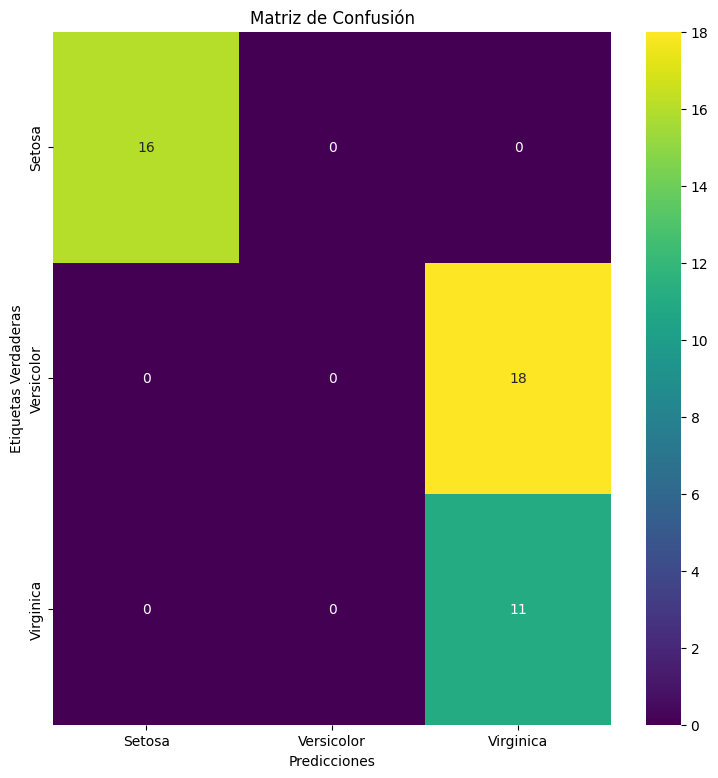

In [17]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [18]:
# Probamos esta vez con un árbol de decisión con una profundidad de dos:
arbol_de_decision_2 = DecisionTreeClassifier(max_depth=2)

In [19]:
arbol_de_decision_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [20]:
arbol_de_decision_2.score(X_test, y_test)


0.9111111111111111

In [21]:
y_predict = arbol_de_decision_2.predict(X_test)

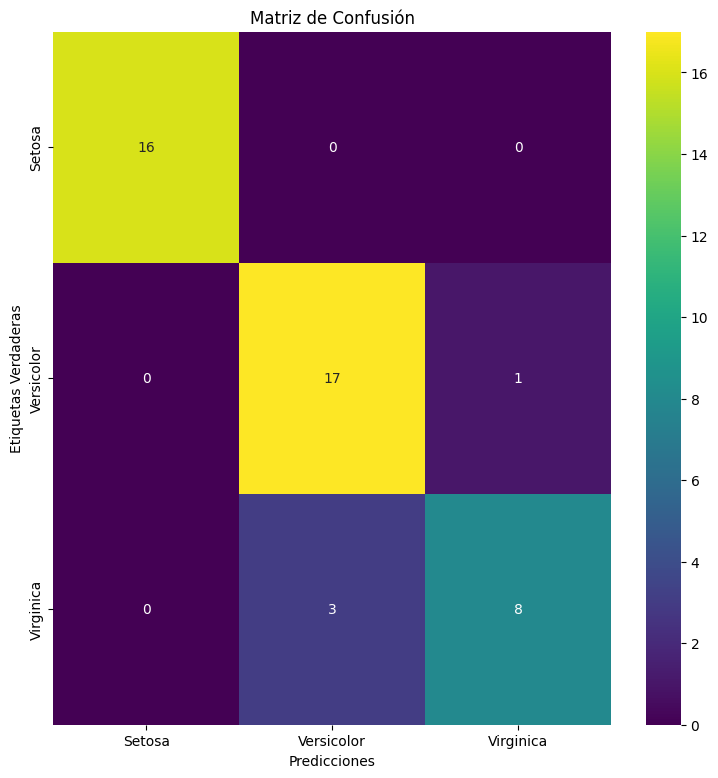

In [22]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [23]:
# Probamos con el KNN con una sola medición:
knn_1 = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
knn_1.score(X_test, y_test)

0.9777777777777777

In [26]:
y_predict = knn_1.predict(X_test)

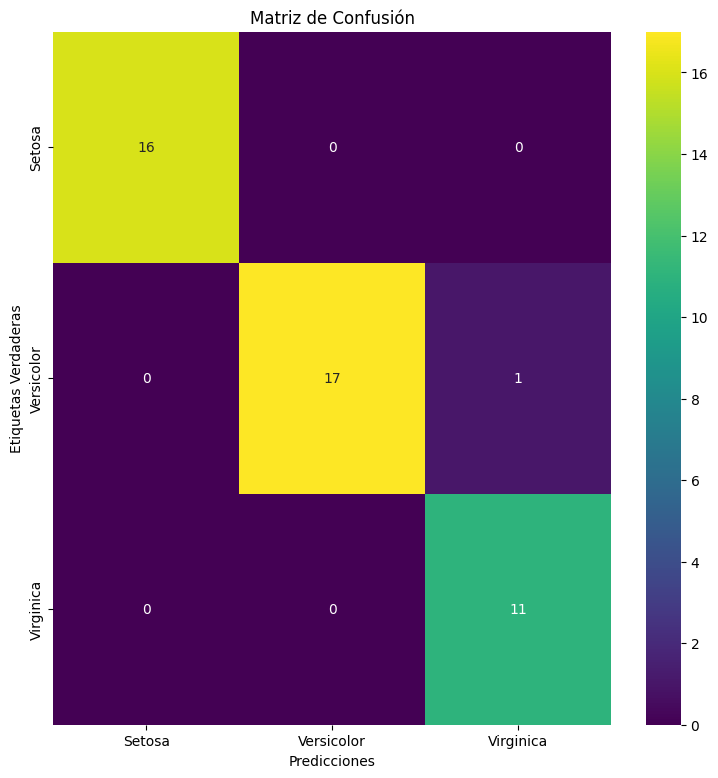

In [27]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()